Week 4 · Day 3 — PCA (Dimensionality Reduction)
Why this matters

Real-world datasets often have many features. PCA helps reduce dimensions while keeping most of the information (variance). It’s used for visualization, speeding up models, and removing noise.

Theory Essentials

PCA = linear projection that maximizes variance.

Each principal component (PC) = a new axis (linear combo of features).

First PC: direction of maximum variance; second PC: orthogonal, next max variance, etc.

Works by eigen-decomposition of covariance matrix (or SVD).

Useful for visualization in 2D/3D, feature compression, noise filtering.

Each PC has an explained variance ratio

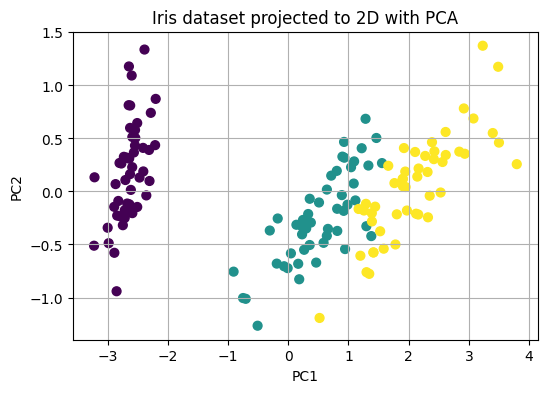

Explained variance ratio: [0.92461872 0.05306648]
Total variance captured: 0.977685206318798


In [1]:
# Setup
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

np.random.seed(42)
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["axes.grid"] = True

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot in 2D
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", s=40)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris dataset projected to 2D with PCA")
plt.show()

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", pca.explained_variance_ratio_.sum())


📌 PCA Summary (with Iris example)

Goal: Reduce dimensions while keeping as much information (variance) as possible.

How it works:

Center the data (subtract means).

Compute the covariance matrix (how features vary together).

Find eigenvectors (directions of maximum spread) and eigenvalues (how much variance each direction has).

Sort eigenvectors by eigenvalues and keep the top ones.

Project the data onto these new axes → new features (PC1, PC2, …).

Why it matters:

Each principal component is orthogonal (independent), so no overlap in information.

Explained variance ratio = fraction of the original data’s spread captured by each axis.

Iris example:

Original data has 4 features.

PCA finds new axes: PC1 (~92%) and PC2 (~5%) capture ~98% of the variance.

Projecting into 2D (PC1, PC2) gives almost the same information as the full 4D dataset.

Exercises

1) Core (10–15 min)
Task: Print the explained variance ratio for all 4 original features.

In [2]:
pca_full = PCA(n_components=4)
pca_full.fit(X)
print("Explained variance ratio:", pca_full.explained_variance_ratio_)
print("Cumulative variance:", np.cumsum(pca_full.explained_variance_ratio_))


Explained variance ratio: [0.92461872 0.05306648 0.01710261 0.00521218]
Cumulative variance: [0.92461872 0.97768521 0.99478782 1.        ]


2) Practice (10–15 min)
Task: Plot cumulative explained variance for 1–4 components.

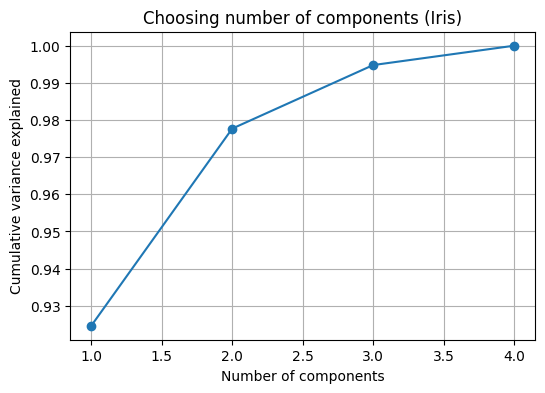

In [3]:
ratios = []
for k in range(1,5):
    pca = PCA(n_components=k)
    pca.fit(X)
    ratios.append(pca.explained_variance_ratio_.sum())

plt.plot(range(1,5), ratios, marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance explained")
plt.title("Choosing number of components (Iris)")
plt.show()


3) Stretch (optional, 10–15 min)
Task: Visualize Iris with first 3 PCs in 3D.

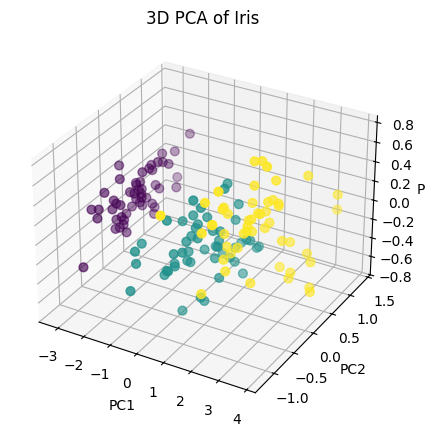

In [4]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=y, cmap="viridis", s=40)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA of Iris")
plt.show()


Mini-Challenge (≤40 min)

Task: Apply PCA to the digits dataset (sklearn.datasets.load_digits).
Acceptance Criteria:

Reduce to 2 components.

Plot 2D scatter colored by digit labels.

Print variance explained.

Briefly discuss if digits separate clearly in 2D.

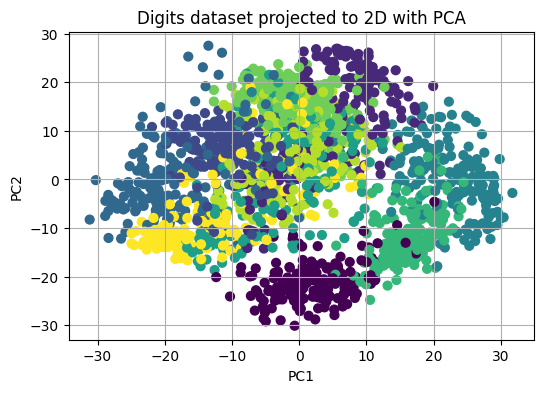

Explained variance ratio: [0.14890594 0.13618771]
Total variance captured: 0.28509364823699296


In [5]:
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target
target_names = digits.target_names

# Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot in 2D
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", s=40)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Digits dataset projected to 2D with PCA")
plt.show()

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", pca.explained_variance_ratio_.sum())

In [7]:
pca_full = PCA(n_components=20)
pca_full.fit(X)
print("Explained variance ratio:", pca_full.explained_variance_ratio_)
print("Cumulative variance:", np.cumsum(pca_full.explained_variance_ratio_))

Explained variance ratio: [0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617]
Cumulative variance: [0.14890594 0.28509365 0.40303959 0.48713938 0.54496353 0.59413263
 0.6372925  0.67390623 0.70743871 0.73822677 0.76195018 0.78467714
 0.80289578 0.82063433 0.83530534 0.84940249 0.86258838 0.87506976
 0.88524694 0.89430312]


Digits overlap in 2D PCA because the first two components only capture ~28% of the variance. This means much of the structure needed to separate digits lies in higher dimensions. PCA is useful for compression and visualization, but not sufficient to fully distinguish handwritten digits in just 2D

Notes / Key Takeaways

PCA reduces dimensions while keeping variance.

First few PCs usually explain most of the structure.

Good for visualization and speed, but PCs are linear combos (not interpretable as original features).

Always check variance explained before deciding number of components.

PCA assumes linearity and maximizes variance, not class separation.

Reflection

Why is PCA unsupervised, even though we often color plots with labels?

Why might PCA not be good for datasets with nonlinear structure?

-It doesnt use the labels it just tries to find axes in the data that allow it to be represented better in lower dimensions. It does this by looking at the data variance only.

-Data sets with nonlinear structure might be difficult to represent in lower dimension axes.